# World Happiness Report

Data Description

The task is to train a model to find the score of happiness of different countries in the range of 0 to 10 where 0 being the worst possible life and 10 being the best possible life. The dataset contains 6 variables on the basis of which happiness of each country is predicted from the year 2015-2017. 

Importing Required Libraries 

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading dataset
df=pd.read_csv('happiness_score_dataset.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
#checking data dimension
df.shape

(158, 12)

In [5]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [6]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [7]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [8]:
#checking the null values in dataset
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


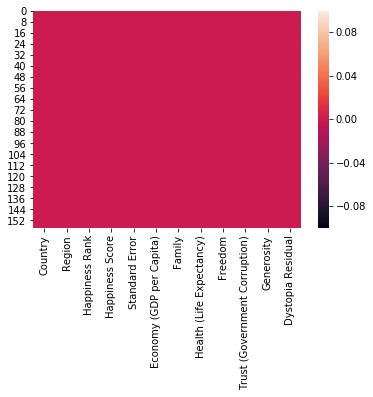

In [10]:
sns.heatmap(df.isnull())

In [11]:
#There are no null values in the dataset

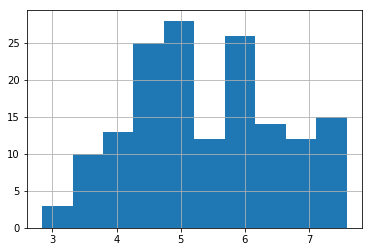

In [12]:
#Univariate Analysis
df['Happiness Score'].hist(grid=True)
plt.show()

Maximum number of people are found to be between score 4.2 to 5.2

In [13]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

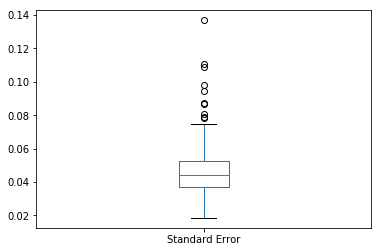

In [14]:
df['Standard Error'].plot.box()

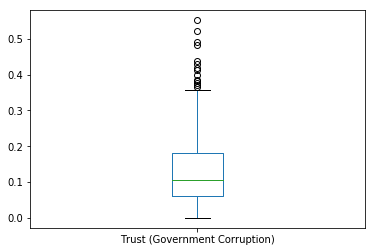

In [15]:
df['Trust (Government Corruption)'].plot.box()

We can find some outliers in Standard Error and Trust( Government Corruption)

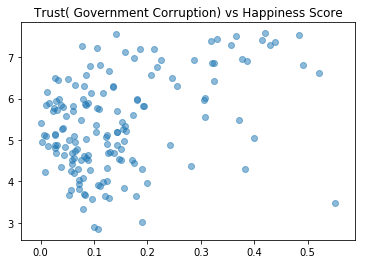

In [16]:
plt.scatter(df["Trust (Government Corruption)"],df["Happiness Score"],alpha=0.5)
plt.title("Trust( Government Corruption) vs Happiness Score")
plt.show()

Here we can see that as the Trust( Government Corruption) increases Happiness Score decreases

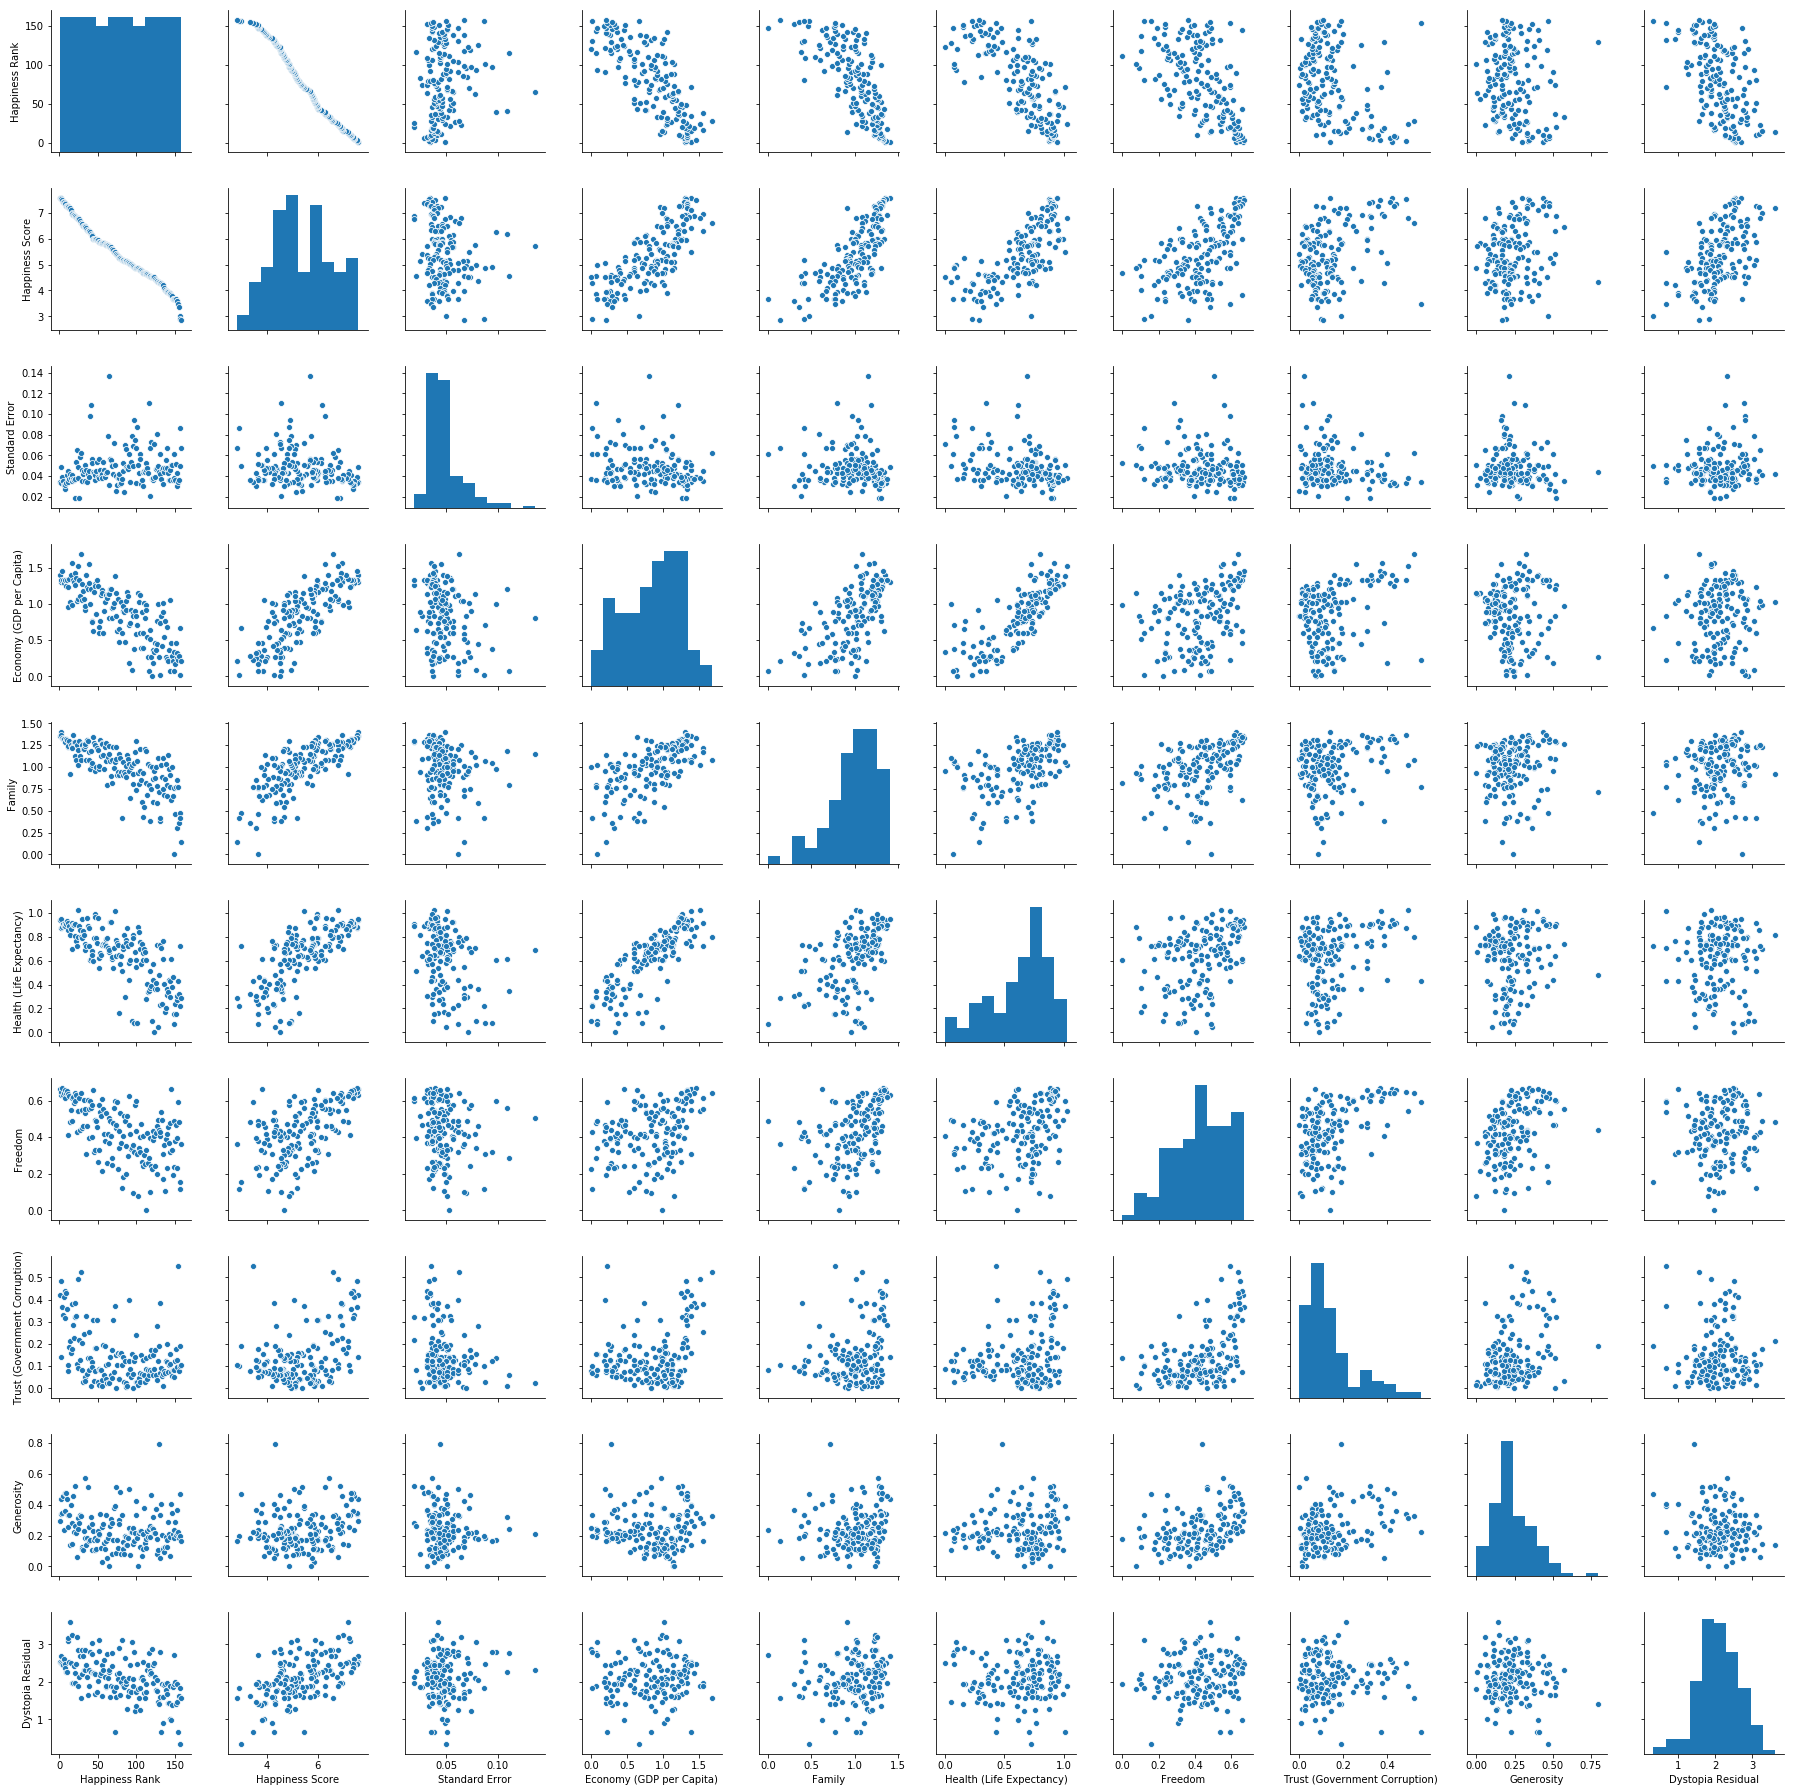

In [17]:
sns.pairplot(df)

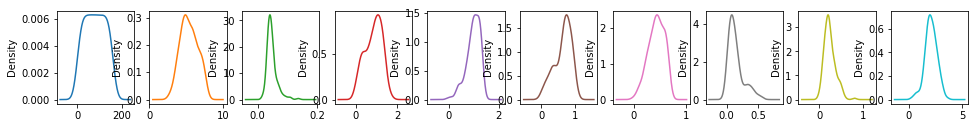

In [27]:
#Another example of multi variate analysis
df.plot(kind='density',subplots=True,layout=(6,11),legend=False,sharex=False,figsize=(18,12))
plt.show()

We can see a little skewness in 1/2 columns 

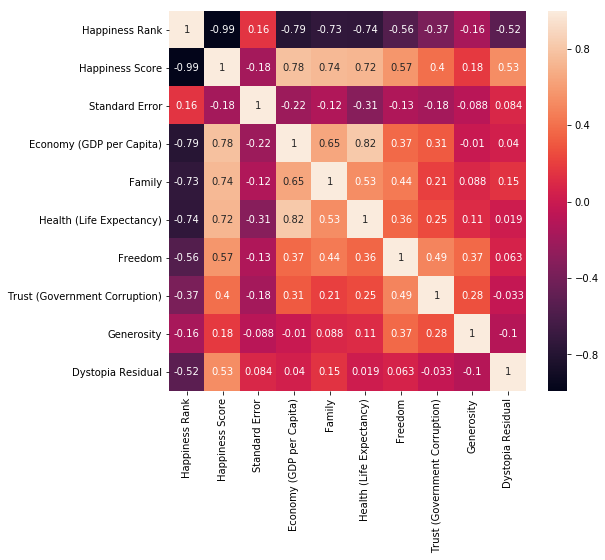

In [19]:
corr_hmap=df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [53]:
#We drop Happiness rank as it is not of much importance in finding the Happiness Score
df.drop('Happiness Rank',axis=1,inplace=True)
df.drop('Country',axis=1,inplace=True)
df.drop('Region',axis=1,inplace=True)

In [54]:
df.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [55]:
#splitting the independent and target variables in x and y
x=df.drop('Happiness Score',axis=1)
y=df['Happiness Score']

In [56]:
#Checking Skewness 
x.skew()

Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

There is no much Skewness in data so no need of removing any outliers and skewness as it is not affecting the data much

In [57]:
x.shape

(158, 8)

In [58]:
y.shape

(158,)

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=45)

In [60]:
x_train.shape

(126, 8)

In [61]:
x_test.shape

(32, 8)

In [62]:
y_train.shape

(126,)

In [63]:
y_test.shape

(32,)

In [71]:
lm=LinearRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
print("Predicted Happiness Score: ",pred)
print('actual Happiness Score: ',y_test)

Predicted Happiness Score:  [4.87428402 7.58683172 3.6777112  4.21851262 5.19372836 7.5221156
 4.07670658 4.57152769 5.10165465 6.41111305 4.55064046 3.81918567
 7.27767988 4.29657813 5.47377275 4.36914121 5.42854758 3.65588263
 3.95566196 5.75854607 3.65505133 6.29471146 4.25198357 4.60974152
 5.99510503 5.19235293 4.33206043 5.70896216 3.99484109 7.42685976
 6.32890934 6.57499544]
actual Happiness Score:  99     4.874
0      7.587
147    3.678
133    4.218
80     5.194
3      7.522
135    4.077
115    4.571
87     5.102
34     6.411
117    4.550
144    3.819
10     7.278
129    4.297
71     5.474
125    4.369
72     5.429
149    3.656
139    3.956
61     5.759
150    3.655
38     6.295
132    4.252
114    4.610
44     5.995
82     5.192
127    4.332
64     5.709
137    3.995
4      7.427
35     6.329
28     6.575
Name: Happiness Score, dtype: float64


In [72]:
lm.coef_

array([0.00118933, 1.00005209, 1.00010559, 0.99988992, 0.99955048,
       0.99991034, 1.00016686, 1.00001138])

In [73]:
lm.intercept_

-2.1796056218548188e-05

In [74]:
lm.score(x_train,y_train)

0.9999999401439761

In [75]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))

print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 0.00024325647206629997
Mean squared error: 8.503823208106773e-08
Root Mean squared error: 0.0002916131548491387


In [76]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.9999999410831234


In [77]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lm,x,y,cv=10)
print("Cross Validation score of LinearRegression model: ",scr.mean())

Cross Validation score of LinearRegression model:  0.9999915038307658


The accuracy obtained is 99.99%

In [80]:
from sklearn.externals import joblib
joblib.dump(lm,'lmfile.obj')

['lmfile.obj']